# Analysis of Supermarket Data

## Step 1

#### Importing libraries to be used

In [24]:
import os
import glob
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

#### Pattern matching using the glob method

In [2]:
files = glob.glob('*.csv')

#### Combining all csv files in the folder

In [3]:
combined = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

In [4]:
combined.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [5]:
combined.tail(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
990,867-47-1948,C,Port Harcourt,Normal,Female,Home and lifestyle,5688.0,10,2844.00,59724.00,1/9/2019,12:07,Cash,56880.0,4.761905,2844.00,7.8
991,256-58-3609,C,Port Harcourt,Member,Male,Fashion accessories,33112.8,1,1655.64,34768.44,3/18/2019,15:29,Cash,33112.8,4.761905,1655.64,9.8
992,364-34-2972,C,Port Harcourt,Member,Male,Electronic accessories,34855.2,3,5228.28,109793.88,3/30/2019,20:37,Cash,104565.6,4.761905,5228.28,6.7
993,744-82-9138,C,Port Harcourt,Normal,Male,Fashion accessories,31006.8,2,3100.68,65114.28,2/7/2019,17:59,Cash,62013.6,4.761905,3100.68,8.2
994,728-47-9078,C,Port Harcourt,Member,Male,Food and beverages,21452.4,4,4290.48,90100.08,1/19/2019,12:46,Cash,85809.6,4.761905,4290.48,9.8
995,148-41-7930,C,Port Harcourt,Normal,Male,Health and beauty,35985.6,7,12594.96,264494.16,1/23/2019,10:33,Cash,251899.2,4.761905,12594.96,6.1
996,189-40-5216,C,Port Harcourt,Normal,Male,Electronic accessories,34693.2,7,12142.62,254995.02,1/9/2019,11:40,Cash,242852.4,4.761905,12142.62,6.0
997,267-62-7380,C,Port Harcourt,Member,Male,Electronic accessories,29642.4,10,14821.20,311245.20,3/29/2019,19:12,Epay,296424.0,4.761905,14821.20,4.3
998,652-49-6720,C,Port Harcourt,Member,Female,Electronic accessories,21942.0,1,1097.10,23039.10,2/18/2019,11:40,Epay,21942.0,4.761905,1097.10,5.9
999,233-67-5758,C,Port Harcourt,Normal,Male,Health and beauty,14526.0,1,726.30,15252.30,1/29/2019,13:46,Epay,14526.0,4.761905,726.30,6.2


#### Exporting combined files into one document for easy analysis.

In [11]:
combined.to_csv('combined_sales_data.csv', index=False)

## Step 2: Data Exploration

In [12]:
DF = pd.read_csv('combined_Sales_data.csv')

#### Observing the first 10 rows of the data.

In [13]:
DF.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4
5,371-85-5789,B,Abuja,Normal,Male,Health and beauty,31672.8,3,4750.92,99769.32,3/5/2019,10:40,Epay,95018.4,4.761905,4750.92,5.1
6,273-16-6619,B,Abuja,Normal,Male,Home and lifestyle,11952.0,2,1195.20,25099.20,3/15/2019,12:20,Card,23904.0,4.761905,1195.20,4.4
7,649-29-6775,B,Abuja,Normal,Male,Fashion accessories,12067.2,1,603.36,12670.56,2/8/2019,15:31,Cash,12067.2,4.761905,603.36,6.7
8,145-94-9061,B,Abuja,Normal,Female,Food and beverages,31809.6,5,7952.40,167000.40,1/25/2019,19:48,Cash,159048.0,4.761905,7952.40,9.6
9,871-79-8483,B,Abuja,Normal,Male,Fashion accessories,33886.8,5,8471.70,177905.70,2/25/2019,19:39,Card,169434.0,4.761905,8471.70,4.8


In [14]:
DF.shape

(1000, 17)

The data has 1000 rows and 17 columns. Column headings are in the list below.

In [15]:
DF.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [16]:
DF.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.220360e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


In [17]:
DF.describe(include='all')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1.000000e+03,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,648-83-1321,A,Lagos,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,14:42,Epay,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,20041.966800,5.510000,5536.572840,116268.029640,NaN,NaN,NaN,110731.456800,4.761905e+00,5536.572840,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,9538.066205,2.923431,4215.177173,88518.720636,NaN,NaN,NaN,84303.543463,6.220360e-14,4215.177173,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,3628.800000,1.000000,183.060000,3844.260000,NaN,NaN,NaN,3661.200000,4.761905e+00,183.060000,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,11835.000000,3.000000,2132.955000,44792.055000,NaN,NaN,NaN,42659.100000,4.761905e+00,2132.955000,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,19882.800000,5.000000,4351.680000,91385.280000,NaN,NaN,NaN,87033.600000,4.761905e+00,4351.680000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,28056.600000,8.000000,8080.290000,169686.090000,NaN,NaN,NaN,161605.800000,4.761905e+00,8080.290000,8.50000


### Comparing default *describe* method to an all-inclusive *describe* method.

* The default method gave a general summary of only numerical values present in the dataset, which consists of 8 out of 17 columns.
* The method with parameter 'include' gave a summary of all datatypes in the dataset.
* There is a total of 1000 sales entries for all the branches of this supermaket. (The 'count' value gives this information)
* There are 3 branches in 3 different cities for this supermarket. (The 'unique' value gives this information).
* All branches have only 2 types of customers of only 2 genders.
* The supermarket is focused on 6 product lines only.
* There are only 3 payments methods acceptable by the supermarket.
* All numerical entries have information like the mean, minimum values, maximum values, etc.

#### Checking for missing values.

In [22]:
DF.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

The above shows that there are no null values in the dataset; i.e, no empty rows.

In [23]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3: Datetime features

#### Converting date and time columns to datetime format

In [25]:
DF['Date'] = pd.to_datetime(DF['Date'])

In [31]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

Successfully changed the date and time column entries to appropriate format for data exploration and analysis.

In [30]:
DF['Time'] = pd.to_datetime(DF['Time'])

In [32]:
DF.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,2021-05-03 13:27:00,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,2021-05-03 18:07:00,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,2021-05-03 17:03:00,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,2021-05-03 16:19:00,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,2021-05-03 15:30:00,Epay,29016.0,4.761905,1450.80,4.4


#### Extracting features from date and time

In [33]:
DF['Day'] = DF['Date'].dt.day

In [34]:
DF['Month'] = DF['Date'].dt.month

In [35]:
DF['Year'] = DF['Date'].dt.year

In [36]:
DF['Hour'] = DF['Time'].dt.hour

In [37]:
DF.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,2021-05-03 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,2021-05-03 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,2021-05-03 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,...,2021-05-03 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019,16
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,...,2021-05-03 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019,15


* A preview of the dataset shows that four new columns for day, month, year, and hour have been added successfully.

In [41]:
DF['Hour'].nunique()

11

In [42]:
DF['Hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

* There are 11 unique hours of sales across all 3 supermakets. Above is an array of each unique hour of the day.

## Step 4: Unique Values in Columns

In [45]:
categorical_columns = [col for col in DF.columns if DF[col].dtype == 'object']

In [46]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [50]:
unique_invoice = DF['Invoice ID'].unique().tolist()

In [51]:
unique_invoice

['692-92-5582',
 '351-62-0822',
 '529-56-3974',
 '299-46-1805',
 '319-50-3348',
 '371-85-5789',
 '273-16-6619',
 '649-29-6775',
 '145-94-9061',
 '871-79-8483',
 '149-71-6266',
 '640-49-2076',
 '777-82-7220',
 '280-35-5823',
 '354-25-5821',
 '132-32-9879',
 '370-41-7321',
 '727-46-3608',
 '669-54-1719',
 '616-24-2851',
 '242-55-6721',
 '347-34-2234',
 '853-23-2453',
 '109-28-2512',
 '510-95-6347',
 '847-38-7188',
 '318-68-5053',
 '152-08-9985',
 '766-85-7061',
 '733-01-9107',
 '716-39-1409',
 '479-26-8945',
 '227-78-1148',
 '291-32-1427',
 '659-65-8956',
 '378-24-2715',
 '219-22-9386',
 '268-27-6179',
 '549-84-7482',
 '191-10-6171',
 '695-51-0018',
 '590-83-4591',
 '241-72-9525',
 '262-47-2794',
 '608-96-3517',
 '279-74-2924',
 '307-85-2293',
 '743-04-1105',
 '423-57-2993',
 '548-46-9322',
 '505-02-0892',
 '316-55-4634',
 '608-27-6295',
 '414-12-7047',
 '895-66-0685',
 '305-14-0245',
 '732-04-5373',
 '284-34-9626',
 '437-58-8131',
 '641-43-2399',
 '542-41-0513',
 '875-46-5808',
 '394-43

In [52]:
print('Total number of unique values in Invoice ID column is {}'.format(len(unique_invoice)))

Total number of unique values in Invoice ID column is 1000


In [53]:
unique_city = DF['City'].unique().tolist()

In [54]:
unique_city

['Abuja', 'Lagos', 'Port Harcourt']

In [55]:
print('Total number of unique values in City column is {}'.format(len(unique_city)))

Total number of unique values in City column is 3


In [56]:
unique_customer = DF['Customer type'].unique().tolist()

In [57]:
unique_customer

['Member', 'Normal']

In [58]:
print('Total number of unique values in the Customer type column is {}'.format(len(unique_customer)))

Total number of unique values in the Customer type column is 2


In [59]:
unique_gender = DF['Gender'].unique().tolist()

In [60]:
unique_gender

['Female', 'Male']

In [61]:
print('Total number of unique values in the Gender column is {}'.format(len(unique_gender)))

Total number of unique values in the Gender column is 2


In [62]:
unique_Product = DF['Product line'].unique().tolist()

In [63]:
unique_Product

['Food and beverages',
 'Fashion accessories',
 'Electronic accessories',
 'Sports and travel',
 'Home and lifestyle',
 'Health and beauty']

In [65]:
print('Total number of unique values in the Product line column is {}'.format(len(unique_Product)))

Total number of unique values in the Product line column is 6


In [66]:
unique_payment = DF['Payment'].unique().tolist()

In [67]:
unique_payment

['Card', 'Epay', 'Cash']

In [68]:
print('Total number of unique values in the Payment column is {}'.format(len(unique_payment)))

Total number of unique values in the Payment column is 3


#### Using value_counts() to genrate count figures of unique values in each categorical column

In [69]:
DF['Invoice ID'].value_counts()

648-83-1321    1
436-54-4512    1
878-30-2331    1
767-54-1907    1
394-55-6384    1
              ..
388-76-2555    1
667-92-0055    1
732-94-0499    1
198-84-7132    1
500-02-2261    1
Name: Invoice ID, Length: 1000, dtype: int64

In [70]:
DF['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [71]:
DF['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

In [72]:
DF['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [73]:
DF['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [74]:
DF['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [75]:
DF['Payment'].value_counts()

Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64

## Step 5:Aggregation with GroupBy

In [77]:
city_group = DF.groupby('City')

In [79]:
DF['City'].nunique()

3

In [80]:
city_group.size()

City
Abuja            332
Lagos            340
Port Harcourt    328
dtype: int64

#### aggregate function of sum and mean

In [93]:
dd = city_group.agg({'gross income':['sum', 'mean'], 
                'cogs':['sum', 'mean'], 
                'Quantity':['sum', 'mean'], 
                'Unit price':['sum', 'mean']})

In [94]:
dd

gross income                     cogs                Quantity  \
                       sum         mean         sum           mean      sum   
City                                                                          
Abuja           1820531.52  5483.528675  36410630.4  109670.573494     1820   
Lagos           1820577.78  5354.640529  36411555.6  107092.810588     1859   
Port Harcourt   1895463.54  5778.852256  37909270.8  115577.045122     1831   

                        Unit price                
                   mean        sum          mean  
City                                              
Abuja          5.481928  6652396.8  20037.339759  
Lagos          5.467647  6705176.4  19721.107059  
Port Harcourt  5.582317  6684393.6  20379.248780

In [95]:
dd[('gross income', 'sum')].max()

1895463.539999999

The table above shows the sums and mean values of gross income, cogs, Quantity, and Unit price.

For this supermarket, the Port Harcourt branch has the highest gross income, as inidcated by the max method - 1895463.54

## Step 6: Data Visualization

Text(0.5, 1.0, 'Branch Grouping by sales')

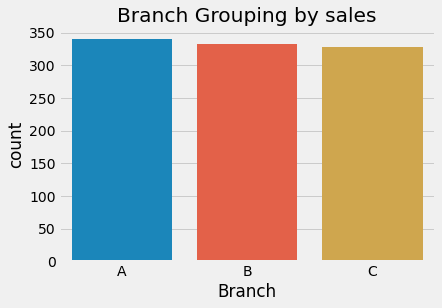

In [128]:
sns.countplot(x='Branch', data=DF, order=['A', 'B', 'C']).set_title('Branch Grouping by sales')

Branch A, located in Lagos has the highest sales over the past 3 months.

Text(0.5, 1.0, 'Grouping by Payment method')

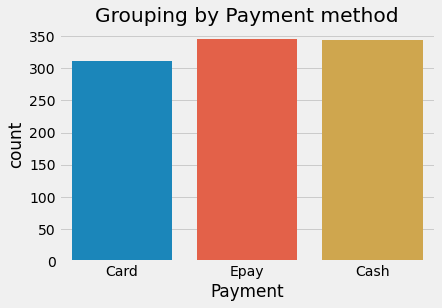

In [100]:
sns.countplot(x='Payment', data=DF).set_title('Grouping by Payment method')

This is an indicator that most customers prefer either Epay or cash payment method.

Text(0.5, 1.0, 'Grouping by City')

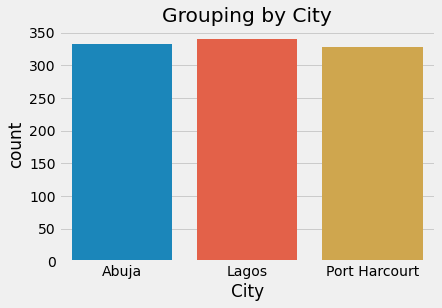

In [101]:
sns.countplot(x='City', data=DF).set_title('Grouping by City')

Text(0.5, 1.0, 'Grouping by Product line')

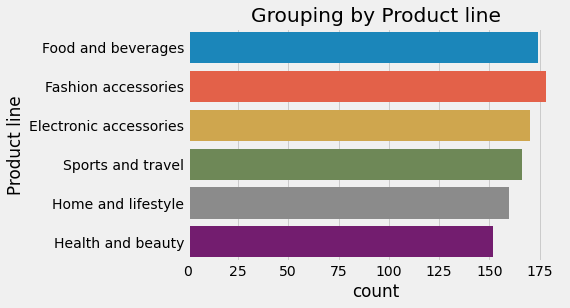

In [106]:
sns.countplot(y='Product line', data=DF).set_title('Grouping by Product line')

Text(0.5, 1.0, 'Grouping by Payment method per product line')

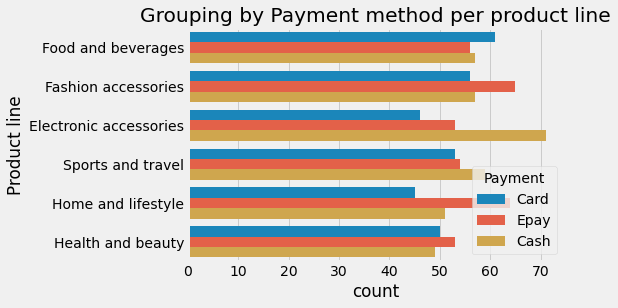

In [107]:
sns.countplot(y='Product line', data=DF, hue='Payment').set_title('Grouping by Payment method per product line')

Both images show that the health and beauty product line recieves the least attention from customers.

Text(0.5, 1.0, 'Grouping by Payment method per Branch')

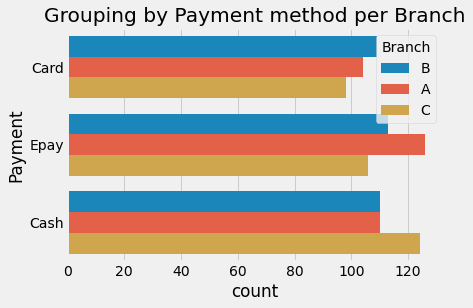

In [110]:
sns.countplot(y='Payment', data=DF, hue='Branch').set_title('Grouping by Payment method per Branch')

Text(0.5, 1.0, 'Branch rating')

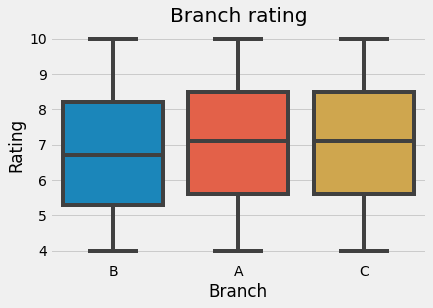

In [112]:
sns.boxplot(x='Branch', y='Rating', data=DF).set_title('Branch rating')

This shows that Branch B located in Abuja has the lowest customer rating and satisfaction, compared to the others.

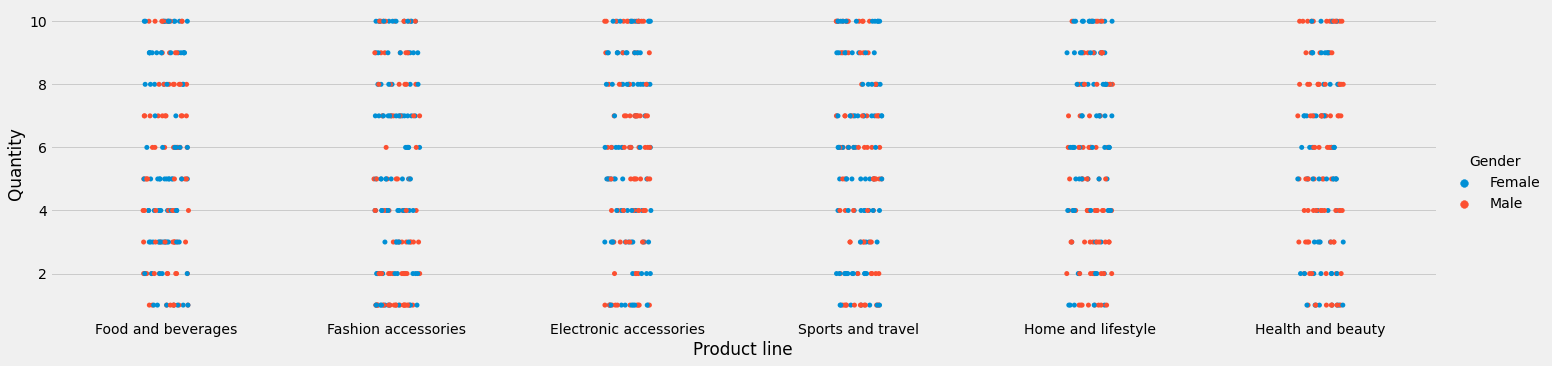

In [115]:
sns.catplot(x='Product line', y='Quantity', hue='Gender', data=DF, aspect=4)

The plot above shows how gender of customers affects sales of certain product lines. For instance, the food and beverages product line has females (blue) buying in larger quantities than males.
The fashion accessories line is also dominated by females while health and beauty products seem to have the attention of males' (orange) than females.

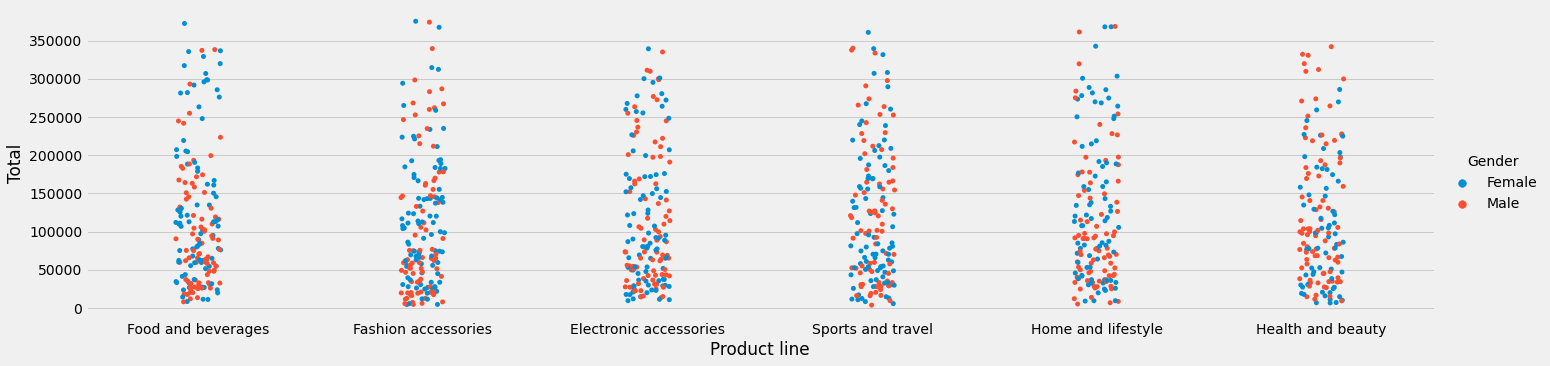

In [116]:
sns.catplot(x='Product line', y='Total', hue='Gender', data=DF, aspect=4)

The colour blue appears at the top of each product, except health and beauty category. This could be an indication that the female customers spend more than the males in this supermarket.

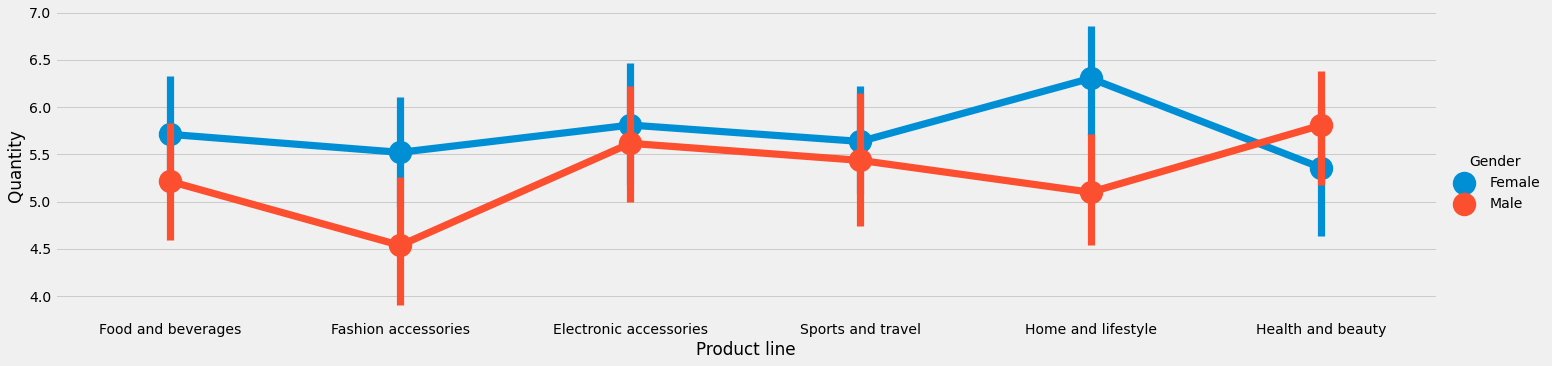

In [117]:
sns.catplot(x='Product line', y='Quantity', hue='Gender', data=DF, aspect=4, kind='point')

This gives a clearer view that the female gender make more purchases compared to the males. They clearly dominate 3 categories of products: food and beverages, fashion acessories, and home and lifestyle. Electronics and sports have an almost similar interest for both genders while, the health and beauty section is populated by the males.

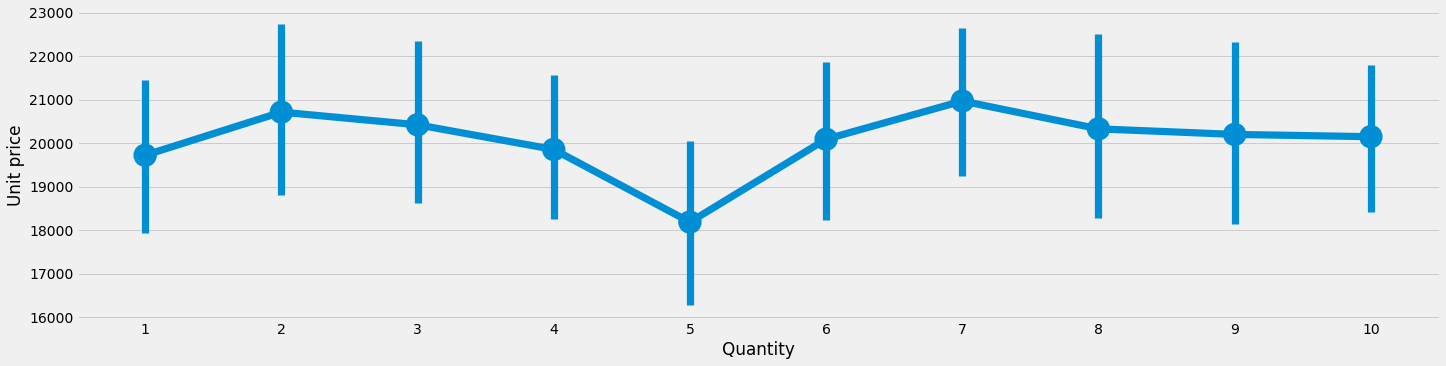

In [125]:
sns.catplot(x='Quantity', y='Unit price', data=DF, aspect=4, kind='point')

Here, we're looking at the effect of unit price on the quantity of goods purchased.
This image shows that unit prices does not necessarily influence quantity of goods purchased generally. Regardless of price, quantities vary randomly.

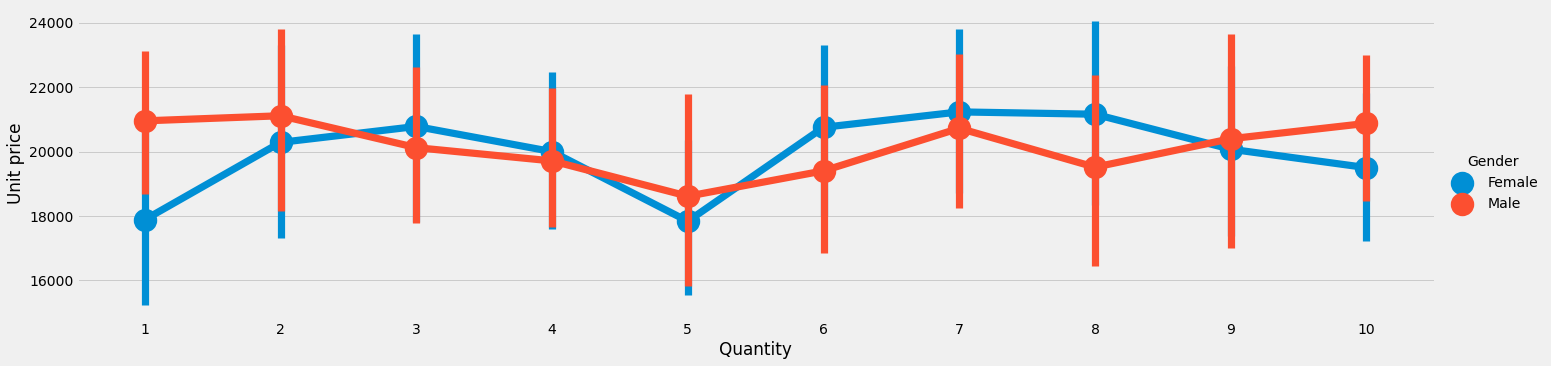

In [127]:
sns.catplot(x='Quantity', y='Unit price', hue='Gender', data=DF, aspect=4, kind='point')

Using gender as a means of assessing the relationship betweeen unit price and quantity: The males seem to be at both extremes, buying 1-2 products, or 9-10 products despite the high unit prices. However, medium priced goods between 18000-19000 sell mostly in quantities of 5, for both genders.
This further proves that unit price does not necessarily influence quantity of goods purchased.

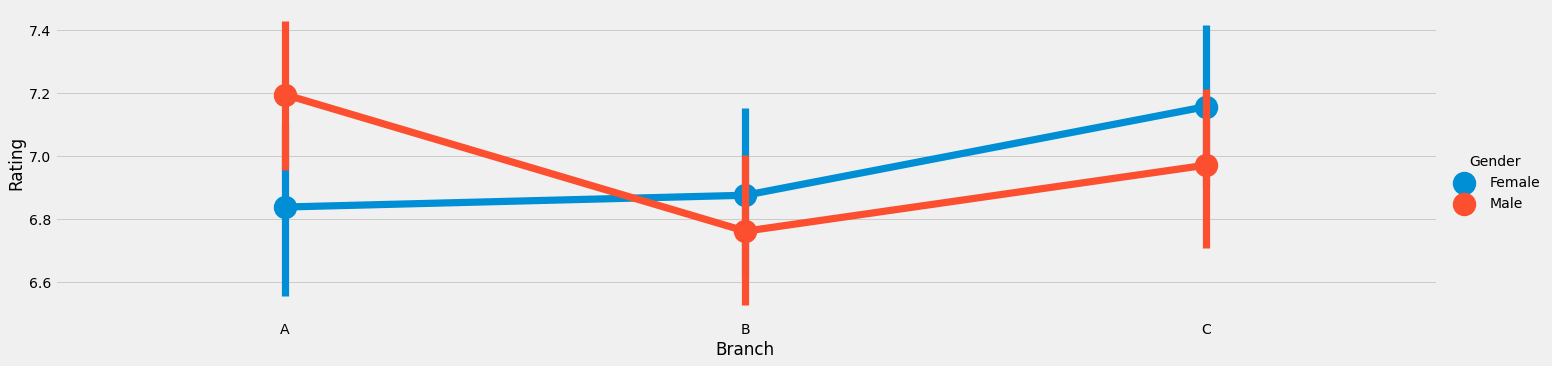

In [132]:
sns.catplot(x='Branch', y='Rating', hue='Gender', order=['A', 'B', 'C'], data=DF, aspect=4, kind='point')

An overview of rating across each branch, by both genders.
Branch A of Lagos which has the highest sales record got lower ratings from the female customers. This is an important angle to look into, as female customers appear to spend more and buy in larger quantities.

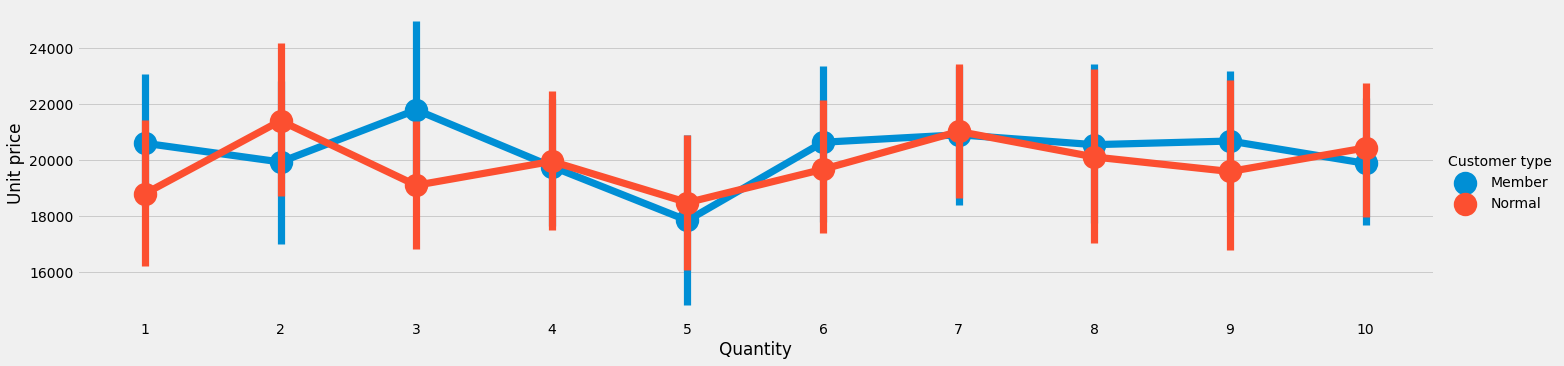

In [133]:
sns.catplot(x='Quantity', y='Unit price', hue='Customer type', data=DF, aspect=4, kind='point')

An attempt to assess if customer type has an effect on the relationship between unit price and quantity purchased.
This shows no significant direct influence,and further strengthens the previous insight that prices do not necesarily influence purchase decisions.